In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wc = pd.read_csv('../../data/weather_clean.csv')

In [3]:
wc.head()

,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2007-05-01,83,51,67,14,51,56,0,2,448,1849,set(),0.00,29.14,29.82,2.20,26,9.40
1,2007-05-02,59,42,51,-2,42,47,13,0,447,1850,"{'HZ', 'BR'}",0.00,29.41,30.08,13.15,3,13.40
2,2007-05-03,66,47,57,3,40,49,8,0,446,1851,{'HZ'},0.00,29.42,30.12,12.30,6,12.55
3,2007-05-04,72,50,61,7,41,50,4,0,444,1852,{'RA'},0.00,29.34,30.04,10.25,7,10.60
4,2007-05-05,66,53,60,5,38,49,5,0,443,1853,set(),0.01,29.43,30.10,11.45,7,11.75


**CodeSum - split into individual code columns
Pseudo-one-hot encode (some observations may have >1 column which has a value e.g. RA BR has 1 for RA & 1 for BR)**

In [4]:
# Set empty
wc['codesum'].replace('set()','', inplace=True)

In [5]:
# Get all codesums
allcode = list(wc['codesum'].unique())

In [6]:
import regex as re
# use regex to remove all non-words, then add into a string
allc = ''
for i in allcode:
    allc = allc+(re.sub("[^a-zA-Z+]", " ", str(i)))

In [7]:
# Set to get unique and create columns 
allcodes = list(set(allc.split()))
for code in allcodes:
    wc[code] = [1 if code in ele else 0 for ele in wc["codesum"]]

In [8]:
# Re-run 'FG' because of duplicates of FG-FG+
wc['FG'] = [1 if 'FG' in ele.replace('FG+','') else 0 for ele in wc["codesum"]]

In [9]:
wc.drop(columns='codesum', inplace=True)

In [10]:
pd.set_option('display.max_columns', 100)
wc.head()

,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,FG,BC,SN,HZ,TS,DZ,GR,RA,FG+,SQ,BR,FU,MI,VC
0,2007-05-01,83,51,67,14,51,56,0,2,448,1849,0.00,29.14,29.82,2.20,26,9.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-02,59,42,51,-2,42,47,13,0,447,1850,0.00,29.41,30.08,13.15,3,13.40,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2007-05-03,66,47,57,3,40,49,8,0,446,1851,0.00,29.42,30.12,12.30,6,12.55,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2007-05-04,72,50,61,7,41,50,4,0,444,1852,0.00,29.34,30.04,10.25,7,10.60,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2007-05-05,66,53,60,5,38,49,5,0,443,1853,0.01,29.43,30.10,11.45,7,11.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Calculate relative humidity**

In [11]:
# https://www.wikihow.com/Calculate-Humidity

In [12]:
t = wc['tavg'].map(lambda x: (x-32)*(5/9))
td = wc['dewpoint'].map(lambda x: (x-32)*(5/9))
es = 6.11*(10*((7.5*t)/(237.3+t)))
e = 6.11*(10*((7.5*td)/(237.3+td)))

In [13]:
wc['rel_humid'] = (e/es)*100

In [14]:
wc

,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,FG,BC,SN,HZ,TS,DZ,GR,RA,FG+,SQ,BR,FU,MI,VC,rel_humid
0,2007-05-01,83,51,67,14,51,56,0,2,448,1849,0.00,29.14,29.82,2.20,26,9.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.232573
1,2007-05-02,59,42,51,-2,42,47,13,0,447,1850,0.00,29.41,30.08,13.15,3,13.40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,53.715177
2,2007-05-03,66,47,57,3,40,49,8,0,446,1851,0.00,29.42,30.12,12.30,6,12.55,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33.250172
3,2007-05-04,72,50,61,7,41,50,4,0,444,1852,0.00,29.34,30.04,10.25,7,10.60,0,0,0,0,0,0,0,1,0,0,0,0,0,0,32.457626
4,2007-05-05,66,53,60,5,38,49,5,0,443,1853,0.01,29.43,30.10,11.45,7,11.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.516969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,78,52,65,17,51,58,0,1,618,1653,0.01,28.96,29.66,12.35,19,13.25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,59.382501
1468,2014-10-28,67,46,57,10,39,47,8,0,619,1651,0.02,29.19,29.85,14.40,26,15.10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,29.160916
1469,2014-10-29,49,38,44,-3,33,41,21,0,620,1650,0.00,29.39,30.06,9.00,29,9.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.547438
1470,2014-10-30,52,34,43,-2,34,41,21,0,622,1649,0.00,29.38,30.10,5.50,23,6.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,18.563130


**Get diff for Tavg (weekly)**

In [15]:
# To get the weekly mean maximum weekly temperature
#Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342965/#:~:text=The%20effects%20of%20weather%20fluctuations,infection%20%5B43%2C81%5D
wc['tavg_change'] = wc['tavg'].diff(7)

In [16]:
wc.head(10)

,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,FG,BC,SN,HZ,TS,DZ,GR,RA,FG+,SQ,BR,FU,MI,VC,rel_humid,tavg_change
0,2007-05-01,83,51,67,14,51,56,0,2,448,1849,0.00,29.14,29.82,2.20,26,9.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.232573,NaN
1,2007-05-02,59,42,51,-2,42,47,13,0,447,1850,0.00,29.41,30.08,13.15,3,13.40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,53.715177,NaN
2,2007-05-03,66,47,57,3,40,49,8,0,446,1851,0.00,29.42,30.12,12.30,6,12.55,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33.250172,NaN
3,2007-05-04,72,50,61,7,41,50,4,0,444,1852,0.00,29.34,30.04,10.25,7,10.60,0,0,0,0,0,0,0,1,0,0,0,0,0,0,32.457626,NaN
4,2007-05-05,66,53,60,5,38,49,5,0,443,1853,0.01,29.43,30.10,11.45,7,11.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.516969,NaN
5,2007-05-06,68,50,59,4,30,46,5,0,442,1855,0.00,29.60,30.28,14.10,10,14.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-7.912688,NaN
6,2007-05-07,83,48,66,11,40,53,0,1,441,1856,0.00,29.41,30.12,8.55,17,10.20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24.935315,NaN
7,2007-05-08,81,57,69,13,57,62,0,4,439,1857,0.00,29.32,30.02,2.60,9,5.60,0,0,0,1,0,0,0,0,0,0,1,0,0,0,69.360841,2.0
8,2007-05-09,76,62,69,13,59,63,0,4,438,1858,0.08,29.24,29.94,3.90,8,6.05,0,0,0,1,0,0,0,0,0,0,1,0,0,0,74.579812,18.0
9,2007-05-10,83,57,70,14,52,60,0,5,437,1859,0.00,29.23,29.92,1.35,13,4.00,0,0,0,1,0,0,0,0,0,0,1,0,0,0,54.750308,13.0


**Incubation period of mosquito - 8 to 10 days. Eggs take up to months to hatch  
Everytime we want to roll weather feature, roll 3 times (5, 14, 28 days)  
Tavg, relative humidity, AvgSpeed, precipTotal  
Give reasoning for each roll**

In [17]:
# To get the rolling mean of below features on specific days
for feat in ['tavg', 'rel_humid', 'avgspeed', 'preciptotal']:
    for days in [5,14,28]:
        wc[(feat+'_lag'+str(days))] = wc[feat].rolling(days).mean()

The incubation period of a WNV mosquito is usually between 8 to 10 days.  
Hence, we want to monitor what is the moving average of the external environment conditions around this time window (5days and 14days).  
We also add a rolling window of 28days to try to see if there are any elements of seasonal change that can be observed.

In [18]:
wc

,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,FG,BC,SN,HZ,TS,DZ,GR,RA,FG+,SQ,BR,FU,MI,VC,rel_humid,tavg_change,tavg_lag5,tavg_lag14,tavg_lag28,rel_humid_lag5,rel_humid_lag14,rel_humid_lag28,avgspeed_lag5,avgspeed_lag14,avgspeed_lag28,preciptotal_lag5,preciptotal_lag14,preciptotal_lag28
0,2007-05-01,83,51,67,14,51,56,0,2,448,1849,0.00,29.14,29.82,2.20,26,9.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.232573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-05-02,59,42,51,-2,42,47,13,0,447,1850,0.00,29.41,30.08,13.15,3,13.40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,53.715177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-05-03,66,47,57,3,40,49,8,0,446,1851,0.00,29.42,30.12,12.30,6,12.55,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33.250172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-05-04,72,50,61,7,41,50,4,0,444,1852,0.00,29.34,30.04,10.25,7,10.60,0,0,0,0,0,0,0,1,0,0,0,0,0,0,32.457626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-05-05,66,53,60,5,38,49,5,0,443,1853,0.01,29.43,30.10,11.45,7,11.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.516969,NaN,59.2,NaN,NaN,39.634503,NaN,NaN,11.54,NaN,NaN,0.002,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,78,52,65,17,51,58,0,1,618,1653,0.01,28.96,29.66,12.35,19,13.25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,59.382501,8.0,58.2,54.142857,54.428571,37.601956,55.170580,50.068099,8.68,9.046429,9.360714,0.002,0.073571,0.108929
1468,2014-10-28,67,46,57,10,39,47,8,0,619,1651,0.02,29.19,29.85,14.40,26,15.10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,29.160916,7.0,59.6,53.928571,54.535714,34.340974,50.591575,48.476990,10.08,9.453571,9.535714,0.006,0.009286,0.109286
1469,2014-10-29,49,38,44,-3,33,41,21,0,620,1650,0.00,29.39,30.06,9.00,29,9.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.547438,-4.0,56.4,53.214286,53.928571,25.021149,44.679555,46.510728,10.81,9.428571,9.533929,0.006,0.005000,0.109286
1470,2014-10-30,52,34,43,-2,34,41,21,0,622,1649,0.00,29.38,30.10,5.50,23,6.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,18.563130,-7.0,52.6,52.428571,53.000000,23.130797,40.108822,44.233602,9.88,9.292857,9.466071,0.006,0.004286,0.090714


In [19]:
# Run export
wc.to_csv('../../data/weather_eng.csv')

[After Combined]

**Wnv against week of year**

In [20]:
train = pd.read_csv('../../data/train_clean.csv')

In [21]:
# Plot temp curve from weather
## MAY NEED TO UPDATE AFTER COMBINED!

wc['ndate'] = pd.to_datetime(wc['date'], format="%Y-%m-%d")
wc['weekofyear'] = wc.ndate.dt.isocalendar().week
wc['year'] = wc.ndate.dt.year

In [22]:
train['ndate'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
train['weekofyear'] = train.ndate.dt.isocalendar().week
train['year'] = train.ndate.dt.year

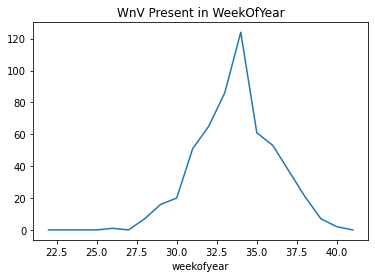

In [23]:
train.groupby('weekofyear')['wnvpresent'].sum().plot()
plt.title('WnV Present in WeekOfYear');

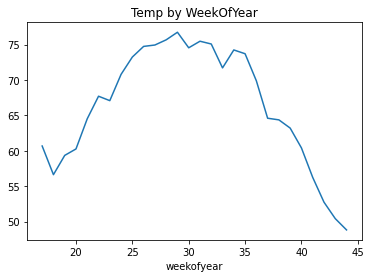

In [24]:
wc.groupby('weekofyear')['tavg'].mean().plot()
plt.title('Temp by WeekOfYear');

Throughout the entire train set, we observe that occurences of WnV peaks around week 33-34 (around August).  
In Chicago, August is in its summer season, so weather is very warm. Temperature usually peaks around July (above we have a plot of mean temperature by WeekofYear).  
This coincides with our subject background research as well. 

- WnV mosquitos usually require 2weeks to grow from larvae to an adult
- After getting infected, the incubation period lasts from 2days to 15days

<u>Temperature profile</u>  
As we can see from the temperature curve, the weather starts getting warm after week 25. Then it slowly rises and peaks around week 28 to 30, and it starts to cool down gradually.

<u>WnV profile</u>  
Assuming a 2weeks to 4weeks infection kickstart period, we also start to see cases slowly rising at week 28. There will be a very steep rise in cases up till the peak around week 33/34. Just as temperature drops after week30, cases tend to fall sharply at week 35 onwards.

## Baseline

Baseline (MT)  
Most important feature to presence of wnv mosquitos  
Lag by incubation period of mosquito    
Log reg that one feature  

In [25]:
new = train.merge(wc, on='date', how='left')
new.head(1)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,ndate_x,weekofyear_x,year_x,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,FG,BC,SN,HZ,TS,DZ,GR,RA,FG+,SQ,BR,FU,MI,VC,rel_humid,tavg_change,tavg_lag5,tavg_lag14,tavg_lag28,rel_humid_lag5,rel_humid_lag14,rel_humid_lag28,avgspeed_lag5,avgspeed_lag14,avgspeed_lag28,preciptotal_lag5,preciptotal_lag14,preciptotal_lag28,ndate_y,weekofyear_y,year_y
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007-05-29,22,2007,88,62,75,11,58,65,0,10,421,1917,0.0,29.42,30.1,5.8,17,6.95,0,0,0,1,0,0,0,0,0,0,1,0,0,0,62.733526,3.0,65.2,64.357143,63.428571,59.221367,40.692805,38.885597,7.51,9.682143,10.2,0.15,0.069286,0.055357,2007-05-29,22,2007


In [26]:
X = new[['tavg_lag14']]
y = new[['wnvpresent']]

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [1]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)
# Only 1 feature, no need to scale

NameError: name 'train_test_split' is not defined

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train.values.ravel())
#Cross validate logreg model
accuracy = cross_val_score(lr, X_train, y_train.values.ravel(), cv=5).mean()
print('Cross val train accuracy is:', accuracy)

# data-convergence error
# .values will give the values in an array. (shape: (n,1)
# .ravel will convert that array shape to (n, )

Cross val train accuracy is: 0.9475822254451696


In [30]:
lr.score(X_train, y_train)

0.9475821804797563

In [31]:
lr.score(X_test, y_test)

0.9474685953559193

In [32]:
new['wnvpresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64

In [45]:
from sklearn.metrics import roc_auc_score

predictions = lr.predict_proba(X_test)[:,1]

roc_auc_score(y_test, predictions)

0.6263807128175566

In [34]:
from sklearn.metrics import plot_roc_curve

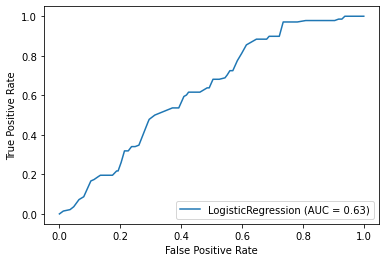

In [35]:
plot_roc_curve(lr, X_test, y_test)  
plt.show()

**Simplest model - predict everything has no WNV**

### Try kaggle

In [36]:
kag = pd.read_csv('../../data/test.csv')
# Lowercase columns
kag.columns = [col.lower() for col in kag.columns]

In [37]:
nkag = kag.merge(wc, on='date', how='left')

In [38]:
sample = pd.DataFrame()
sample['Id'] = kag['id']
sample['WnvPresent'] = lr.predict(nkag[['tavg_lag14']])

In [39]:
sample

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
116288,116289,0
116289,116290,0
116290,116291,0
116291,116292,0


In [40]:
sample['WnvPresent'].value_counts()

0    116293
Name: WnvPresent, dtype: int64

<AxesSubplot:xlabel='year'>

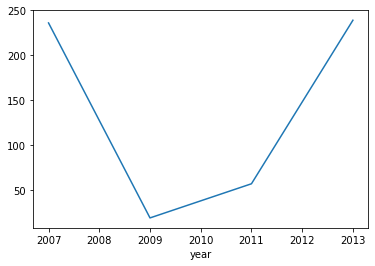

In [41]:
train.groupby('year')['wnvpresent'].sum().plot()

<AxesSubplot:xlabel='year'>

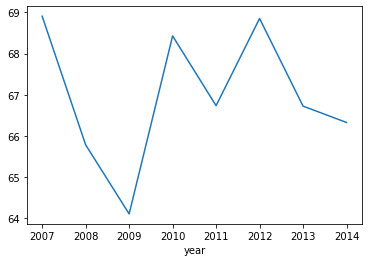

In [42]:
wc.groupby('year')['tavg'].mean().plot()

<AxesSubplot:xlabel='year'>

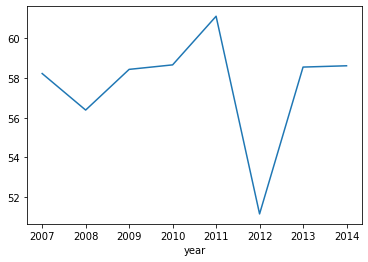

In [43]:
wc.groupby('year')['rel_humid'].mean().plot()